# Práctica 3. Errores e incertidumbres.

## 1. Introducción. Representaciones de los números en la computadora.

### 1.-Ejercicios de desbordamiento (overflow underflow)

1.- Los números en la computadora tienen un límite, determinemos el límite de python aquí en jupyter. Escriba un codigo que defina las variable maximo y minimo igual a 1 (flotante) (ambas), itere n-veces un procedimiento que multiplique maximo por 2 y minimo por dos. Encuentre n tal que máximo y mínimo producen un desbordamiento. 

In [1]:
import numpy as np
import math as math
maximo = 1.
minimo = 1.
n = 0
while math.isinf(maximo) != True and minimo != -np.inf:
    maximo *=  2.
    minimo *= -2.
    n +=1
print(n)

1024


Encuentre el número de iteraciones para crear un desbordamiento con numero enteros.

In [2]:
maximo = 1
minimo = 1
n = 2147483647
for i in range(n):
    maximo += 1
    minimo -= 1
print(maximo)
    

KeyboardInterrupt: 

### 2.- Precisión de la máquina

Determine de manera experimental la presición de la maquina para. 

números flotantes:

In [3]:
n = 1.
while n!=0:
    precc = n
    n/=2.
print(precc)

5e-324


In [4]:
n = complex(1. + 1.j)
while n!=0:
    precc = n
    n/=2.
print(precc)

(5e-324+5e-324j)


### 3.- Suma de Series

Un ejemplo numérico clásico es la suma de seriesm infinitas para evaluar una función. Por ejemplo para evaluar el $\sin(x)$:

$\sin(x)=x-\dfrac{x^3}{3!}+\dfrac{x^5}{5!}-\dfrac{x^7}{7!}+...$ (exacto)

El problema es evaluar esta serie para $x<2\pi$ y $x>2\pi$ con un error absoluto cero o con menos de 1 parte en $10^8$. ¿Cuando debemos dejar de sumar términos?

$\sin(x) \approx \sum_{n=1}^{N}\dfrac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}$ (algoritmo)

Escriba un algoritmo que evalue la suma anterior.

In [5]:
from math import factorial
x = np.pi/2.
print(np.sin(x))
n = 1 
sin = 0. 
sin_old = 1.
while(abs(sin-sin_old)> 1e-8):
    sin_old = sin
    sin += (-1.)**(n-1)*x**(2.*n-1.)/(factorial(2.*n-1))
    n += 1
print(n)
print(sin)
    

1.0
9
0.9999999999939768


Si se quiere escribir un algoritmo para evaluar la suma anterior, podemos evaluar el cociente primero evaluando el número $(-1)^{n-1}x^{2n-1}$ y luego dividiendolo entre  $(2n-1)!$, sin emabrgo este método no es eficiente por las siguiente razones:
1.- Tanto el numerador como el denominador pueden ser muy grandes causando un desbordamiento, sin embargo puede ser que el cociente entre ambos sea pequeño. 
2.- Las potencias y los factoriales son muy costosos computacionalmente hablando.
Entonces reescribimos para evaluar de manera más eficiente, relacionando el siguiente término con el anterior.

$\dfrac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}=\dfrac{-x^2}{(2n-1)(2n-2)}\dfrac{(-1)^{n-2}x^{2n-3}}{(2n-3)!}$

Así el 

$n$-ésimo término$= \dfrac{-x^2}{(2n-1)(2n-2)}\times(n-1)$-ésimo término

Escriba un código que evalue la suma anterior con una presición de $10^{-8}$

In [6]:
x = 6
term = x 
sin = x
tol = 1e-8
n = 2
while abs(term/sin) > tol:
    term = -term * x**2./((2.*n+1)*(2.*n-2))
    sin += term
    n+=1
print(sin)
print(n)
                        

-0.5033697681608892
16


Muestre que para valores suficientemente pqueños de $x$ el algoritmo converge y converge a la respuesta correcta.

In [7]:
x = 0.4
term = x 
sin = x
tol = 1e-8
n = 2
while abs(term/sin) > tol:
    term = -term * x**2./((2.*n+1)*(2.*n-2))
    sin += term
    n+=1
print(sin)
print(n)
           

0.3936364632658009
6


Muestre que para valores de $x$ donde el algoritmo converge pero a la respuesta erronea.

In [8]:
x = 10
term = x 
sin = x
tol = 1e-8
n = 2
while abs(term/sin) > tol:
    term = -term * x**2./((2.*n+1)*(2.*n-2))
    sin += term
    n+=1
print(sin)
print(n)

0.23540082540670332
22


Este es un buen ejemplo pues el valor teórico de sin(10) = - 0.54402, mientras que el resultado obtenido no es el correcto, por lo que este es un buen ejemplo de que el algoritmo converge pero no al resultado correcto.

Muestre que hay valores de $x$ para los cuales el algoritmo ni siquera converge.

In [9]:
x = 600
term = x 
sin = x
tol = 1e-8
n = 2
while abs(term/sin) > tol:
    term = -term * x**2./((2.*n+1)*(2.*n-2))
    sin += term
    n+=1
print(sin)
print(n)
           

-7.302780743612824e+240
438


En este último ejercicio vemos que para x muy grandes, el algoritmo no converge, incluso puede llegar a un overflow.

Use la identidad $\sin(x+2n\pi)=\sin(x)$ para mostrar que el algoritmo converge incluso para $x$ grande.

In [10]:
x = 900.
if (x> 2.*np.pi):
     x %= (2.*np.pi)
print(x)
term = x
sin = x
tol = 1e-8
n = 2
while abs(term/sin) > tol:
    term = -term * x**2./((2.*n+1)*(2.*n-2))
    sin += term
    n+=1
print(sin)
print(n)

1.5045010733191688
1.1903588118085322
8


Esta vez vemos que el algoritmo converge para x muy grande.

## 2.- Errores 

### 1.- Cancelación por sustracción

Cálculos que involucran números que están guardados aproximadamente solo pueden arrojar resultados aproximados. Para desmostrar el efecto de este tipo de incertidumbre, modelamos la representación computacional de algún número exacto $x_c$ como sigue,

$x_c\approx x(1+\epsilon_x)$

Aquí $\epsilon_x$ es el error relativo de $x_c$, que esperamos que sea de magnitud similar a la precisión de la máquina $\epsilon_m$

Ejemplo de sustracción:
$a=b+c$
en la máquina se convierte en:

$a_c = b_c - c_c \approx b(1+\epsilon_b) - c(1+\epsilon_c)$

Así

$\dfrac{a_c}{a}=1+\epsilon_b\dfrac{b}{a}-\dfrac{c}{a}\epsilon_c$

1.- De esta última expresión vemos que el error resultante en $a$ es esencialemnte el promedio pesado de los errores de $b$ y $c$, sin ninguna garantia de que los dos últimos números se cancelen.

De especial importancia es la observación de que el error en la respuesta $a$ incrementa cuando $b$ se aproxima a $c$ ya que estamos sustrayendo la parte significativa de ambos números y dejando el error:


$\dfrac{a_c}{a} \approx 1 + \epsilon_a \approx a +\dfrac{b}{a}(\epsilon_a-\epsilon_b) \approx 1 + \dfrac{b}{a}\max(|\epsilon_a|,|\epsilon_c|)$

Asumimos el peor caso, por eso tomamos el máximo.

Considere la ecuación cuadrática dada por:

$ax^2 + bx + c = 0$

Por inspección podemos ver que el error aumenta cuando $b^2\gg 4ac$ ¿Porqué?

1.- Escriba un código que encuentre la solución de la ecuación cuadrática para $a$, $b$, y $c$ dados.

In [11]:
def Fact(a,b,c):
    x1 = (-b + np.sqrt(b**2. - 4.*a*c))/(2.*a)
    x2 = (-b - np.sqrt(b**2. - 4.*a*c))/(2.*a)
    print(x1,x2)
    return

2.- Estudie como el error en la respuesta aumenta cuando el error de sustracción aumenta. (Pista: una buena prueba es hacer $a=1$, $b=1$ y $c=10^{-n}$ con $n=1,2,3...$). Compare el resultado con la presición de la máquina.

In [12]:
Fact(1,1,1e-1)
Fact(1,1,1e-3)
Fact(1,1,1e-7)
Fact(1,1,1e-16)

-0.112701665379 -0.887298334621
-0.00100100200501 -0.998998997995
-1.00000009995e-07 -0.9999999
-1.11022302463e-16 -1.0


Sustracción en Series. Otro ejemplo de suma de series es el siguiente, considere la suma finita:

$S_N^{(1)}=\sum_{n=1}^{2n}(-1)^n\dfrac{n}{n+1}$

Esta suma se puede evaluar de forma alternativa, separando en pares e impares y así guardando la resta para el final.

$S_N^{(2)}=-\sum_{n=1}^{N}\dfrac{2n-1}{2n}+\sum_{n=1}^{N}\dfrac{2n}{2n+1}$

Sin embargo también se puede realizar la resta de manera analítica y escribir:

$S_N^{(3)}=-\sum_{n=1}^{N}\dfrac{1}{2n(2n+1)}$.

Aunque $S_N^{(1)}$, $S_N^{(2)}$ y $S_N^{(3)}$ son matemáticamente idénticas, ellas puden dar diferentes resultados numéricos.

a) Escriba un código que evalue $S_N^{(1)}$, $S_N^{(2)}$ y $S_N^{(3)}$.

In [13]:
def S1(n):
    suma = 0.
    for i in range(1,2*n+1):
        suma += (-1.)**i*(i/(i+1))
    return suma
def S2(n):
    suma = 0.
    for i in range(1,n):
        par = -(2.*i-1)/(2*i)
        impar = 2.*i/(2.*i+1)
        suma += par + impar
    return suma
def S3(n):
    suma = 0.
    for i in range(1,n):
        suma += 1./(2.*i*(2.*i+1))
    return suma
    
        

b) Asuma $S_N^{(3)}$ como correcta. Haga una gráfica de log-log del error relativo vs el número de términos, esto es

$log_{10}|(S_N^{(1)}-S_N^{(3)})/S_N^{(3)}|$ vs $log_{10}(N)$

Comience con $N=1$ y hasta $N=1,000,000$. Recuerde que $log_{10}=ln(x)/ln(10)$

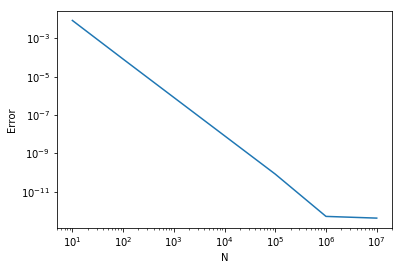

In [14]:
import matplotlib.pyplot as plt
Error = []
N = [10,100,1000,10000,100000,1000000,10000000]
for i in N:
    error = abs((S1(i) - S3(i))/S3(i))
    Error.append(error)
plt.loglog(N,Error)
plt.xlabel('N')
plt.ylabel('Error')
plt.show()
    

c) Existe alguna región d ela gráfica donde hay comportamiento lineal. Esto indica que el error es proporcional a una potencia de $N$.

 3.- Apesar del poder de su confiable computadora, incluso al calcular una suma se tiene que meditar y ser cuidadoso. Veamos el siguiente ejemplo:
 
 Considere las dos series:
 
 $S^{arriba}=\sum_{n=1}^{N}\dfrac{1}{n}$,     $S^{abajo}=\sum_{n=N}^{1}\dfrac{1}{n}$
 
 ¿Cuál de las dos espera que sea más precisa y porqué?

a) Escriba un código que evalue $S^{arriba}$ y $S^{abajo}$ como función de $N$

In [15]:
def Sup(N):
    suma = 0.
    for i in range(1,N+1):
        suma += 1./i
    return suma
def Sdown(N):
    suma = 0.
    for i in range(N+1,0,-1):
        suma += 1./i
    return suma


b) Haga una gráfica log-log para analizar el error de $log_{10}|(S^{arriba}-S^{abajo})/(|S^{arriba}|+|S^{abajo}|)|$ vs $N$.

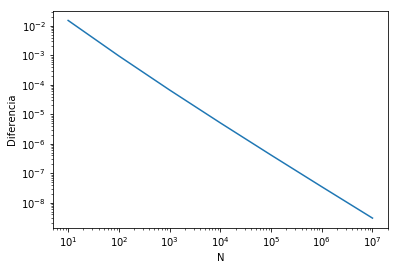

In [16]:
Error = []
N = [10,100,1000,10000,100000,1000000,10000000]
for i in N:
    error = abs(Sup(i)-Sdown(i))/(abs(Sup(i))+abs(Sdown(i)))
    Error.append(error)
plt.loglog(N,Error)
plt.xlabel('N')
plt.ylabel('Diferencia')
plt.show()

c) Observe el resultado del inciso anterior y explique las implicaciones de sus resultados.

### 2. Errores de redondeo

Analicemos ahora como surjen los errores en la división simple.

$a=\dfrac{b}{c}$

entonces

$a_c=\dfrac{b_c}{c_c}=\dfrac{b(1+\epsilon_b)}{c(1+\epsilon_c)}$

así

$\dfrac{a_c}{a}=\dfrac{1+\epsilon_b}{a+\epsilon_c} \approx (1+\epsilon_b)(1+\epsilon_c) \approx 1 + \epsilon_b -\epsilon_c$,

por tanto

$\dfrac{a_c}{a} \approx 1+ |\epsilon_b| + |\epsilon_c|.$

Aquí hemos ignorado los términos cuadráticos y sumamos los valores absolutos de los errores porque no podemos asegurar que se van a cancelar. Podemos generalizar este modelo, para estimar el error de evaluación de una función general $f(x)$, esto es la diferencia entre la función evaluada en $x$ y en $x_c$

$\varepsilon=\dfrac{f(x)-f(x_c)}{f(x)}\approx\dfrac{\text{d}f(x)/\text{d}x}{f(x)}(x-x_c)$

Encuentre analícamente una expresión para el error al evaluar $f(x)=\sqrt{1+x}$

Error: $\varepsilon=\frac{1}{1+x}(x-x_c)$

El error total relativo $\epsilon_{er}$ que sruje después de $N$ cálculos cada uno con la presición de la máquina $\epsilon_{m}$, es en promedio

$\epsilon_{er}\approx\sqrt{N}\epsilon_m$.

Esto solo ocurre para cuando el error ocurre de manera aleatoria. Si el error es coherente este puede tener otro factor, incluso $N!$

1.- Error en la funciones Bessel. Evalue las funciones esféricas de Bessel y de Neumann, $j_l(x)$ y $n_l(x)$. Ellas son la soluciones regular e irregular de la ecuación diferencial

$x^2f(x) + 2xf'(x) + [x^2 - l(l-1)]f(x)=0$.

Tenemos las siguientes relaciones.

![Relaciones](P3-01.png)

Adoptamos en método basado en las relaciones recurrencia siguientes.

![Recurrencia](P3-02.png)

a) Escriba un código que evalue por recurrecion 'up' y 'down' $j_l(x)$ para $x=0.1,1 y 10$

In [21]:
def Jldown(x,n):
    J = np.zeros(n+2)
    J[n+1] = J[n] = 1.0
    for i in range(n,0,-1):
        J[i-1] = ((2.*i +1)/x)*J[i] - J[i+1]
    escala = (np.sin(x)/x)/J[0]
    return J[n] * escala

def Jlup(x,n):
    J = np.zeros(n+2)
    J[0] = np.sin(x)/x
    J[1] = np.sin(x)/x**2. - np.cos(x)/x
    for i in range(1,n+1):
        J[i+1] = ((2.*i +1)/x)*J[i] - J[i-1]
    return J[n]

In [22]:
print(Jldown(0.1,3),Jlup(0.1,3))
print(Jldown(0.1,5),Jlup(0.1,5))
print(Jldown(0.1,8),Jlup(0.1,8))
print(Jldown(1.,3),Jlup(1.,3))
print(Jldown(1.,5),Jlup(1.,5))
print(Jldown(1.,8),Jlup(1.,8))
print(Jldown(10.,3),Jlup(10.,3))
print(Jldown(10.,5),Jlup(10.,5))
print(Jldown(10.,8),Jlup(10.,8))


9.65497593319e-06 9.51851727238e-06
9.7038635154e-10 -1.44569836102e-08
2.91827728655e-16 -0.0330655784901
0.0103885306766 0.00900658111711
0.000101199156321 9.25611585703e-05
2.99453767106e-08 2.81790093482e-08
1.20893580198 -0.0394958449845
-0.0604837523919 -0.0555345116215
0.0904240433668 0.12557802365


b) Ajuste su programa que para que dé buenos valores, es decir con errores realtivos de $\approx 10_{-10}$.

In [ ]:
def Jldown(x,n):
    J = np.zeros(n+2)
    J[n+1] = J[n] = 0.01
    for i in range(n,0,-1):
        J[i-1] = ((2.*i +1)/x)*J[i] - J[i+1]
    escala = (np.sin(x)/x)/J[0]
    return J[n] * escala

def Jlup(x,n):
    J = np.zeros(n+2)
    J[0] = np.sin(x)/x
    J[1] = np.sin(x)/x**2. - np.cos(x)/x
    for i in range(1,n+1):
        J[i+1] = ((2.*i +1)/x)*J[i] - J[i-1]
    return J[n]

c) muestre la convergencia y estabilidad de sus resultados.

In [23]:
print(Jlup(100,3),Jldown(100,3))
print(Jlup(1000,5),Jldown(1000,5))

0.00891399736961 -0.00563501918095
-0.0005499171812 -0.000844705995447


d) Compare la diferencia realticva de los resultados de los métodos 'up' y 'down'.

In [24]:
l = 5
x = np.linspace(0.1,100,1000)
for i in range(len(x)):
    dif = abs(Jlup(x[i],l)-Jldown(x[i],l))/(abs(Jlup(x[i],l))+ abs(Jldown(x[i],l)))
    print(l,Jlup(x[i],l), Jldown(x[i],l), dif)
    

5 -1.44569836102e-08 9.7038635154e-10 1.0
5 3.04382702376e-08 3.12973726715e-08 0.0139158254999
5 2.32936544435e-07 2.39344975543e-07 0.0135690913939
5 9.79038674312e-07 1.01491066489e-06 0.0179904222596
5 2.97746589695e-06 3.11415382609e-06 0.0224386838578
5 7.37756245433e-06 7.78508664697e-06 0.0268768465138
5 1.58661150333e-05 1.6891651415e-05 0.0313066638191
5 3.0755125254e-05 3.30344179957e-05 0.0357314479081
5 5.50591967184e-05 5.96659747027e-05 0.0401549017292
5 9.25611585703e-05 0.000101199156321 0.0445808407952
5 0.000147864652106 0.000163106356496 0.0490132648014
5 0.000226432578158 0.000252008310509 0.0534564100943
5 0.000334610477993 0.000375750912336 0.0579147950646
5 0.000479634099138 0.00054346885283 0.0623932846338
5 0.000669620596283 0.000765635143869 0.0668971702395
5 0.000913543019563 0.00105409594369 0.0714322732718
5 0.00122118795172 0.00142209055206 0.0760050823447
5 0.00160309636862 0.00188425705669 0.0806229406013
5 0.00207048801121 0.00245662498994 0.0852943097

5 -0.035748824766 0.0123897460112 1.0
5 -0.0315314132659 0.0376765187879 1.0
5 -0.0270707921671 0.0637759396706 1.0
5 -0.0224096790778 0.0904946481843 1.0
5 -0.0175922380339 0.117626792778 1.0
5 -0.012663671431 0.144954921843 1.0
5 -0.00766980519673 0.172250913078 1.0
5 -0.00265667097952 0.199276923445 1.0
5 0.00232991086446 0.225786339225 0.979572600693
5 0.0072447437246 0.251524702453 0.944006189049
5 0.0120436589285 0.276230586186 0.916443045936
5 0.0166839080631 0.299636386253 0.894512566137
5 0.0211245399393 0.321468991239 0.876678699293
5 0.0253267588681 0.341450284884 0.861895615882
5 0.0292542611031 0.359297425275 0.849418946675
5 0.032873546518 0.374722832394 0.838695590939
5 0.0361542028233 0.387433798451 0.829295434646
5 0.0390691598935 0.397131612398 0.820866159002
5 0.0415949120558 0.403510058481 0.813100662499
5 0.0437117064963 0.40625310511 0.805710556164
5 0.0454036962566 0.405031539215 0.798400779153
5 0.046659056623 0.39949821441 0.790840317295
5 0.0474700640536 0.389

5 -0.0145367463165 0.00457476598352 1.0
5 -0.0144395639269 0.00245553546772 1.0
5 -0.0141995033055 0.000321000073126 1.0
5 -0.0138193541738 -0.00180751292354 0.768665988867
5 -0.0133032860697 -0.00390882823543 0.545804987563
5 -0.0126568031534 -0.00596213243123 0.359562483674
5 -0.0118866859299 -0.00794717930707 0.198625259158
5 -0.0110009204989 -0.00984448874596 0.0554765674952
5 -0.0100086160693 -0.011635537119 0.0751667683882
5 -0.00891991158524 -0.0133029373747 0.197230597991
5 -0.00774587241868 -0.014830607073 0.313810426331
5 -0.00649837817853 -0.0162039227475 0.427513695664
5 -0.00519000277062 -0.0174098591207 0.54070491266
5 -0.00383388791724 -0.0184371118559 0.655705809681
5 -0.00244361140596 -0.0192762026951 0.774987815772
5 -0.00103305138623 -0.0199195660145 0.901391662295
5 0.00038375193229 -0.0203616160145 1.0
5 0.0017927358037 -0.0205987939607 1.0
5 0.0031799543077 -0.0206295950877 1.0
5 0.0045317161704 -0.0204545749845 1.0
5 0.00583471968405 -0.0200763354829 1.0
5 0.0070

e) Los errores en el cálculo dependen de los valores de $x$ expliqeu porqué